In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from folium.plugins import HeatMap
import calendar

In [2]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # Using a built-in style that's similar to seaborn
sns.set_palette("husl")

In [3]:
# Load the CSV file
df = pd.read_csv("California_airquality.csv")

df

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,1/1/20,AQS,60010007,3,8.6,ug/m3 LC,36,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,1/2/20,AQS,60010007,3,4.5,ug/m3 LC,19,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,1/3/20,AQS,60010007,3,14.2,ug/m3 LC,55,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,1/4/20,AQS,60010007,3,10.9,ug/m3 LC,45,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,1/5/20,AQS,60010007,3,7.8,ug/m3 LC,33,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30510,3/28/20,AQS,61131003,1,1.0,ug/m3 LC,4,Woodland-Gibson Road,1,100,88101,PM2.5 - Local Conditions,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
30511,4/3/20,AQS,61131003,1,1.0,ug/m3 LC,4,Woodland-Gibson Road,1,100,88101,PM2.5 - Local Conditions,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
30512,4/15/20,AQS,61131003,1,6.5,ug/m3 LC,27,Woodland-Gibson Road,1,100,88101,PM2.5 - Local Conditions,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
30513,4/21/20,AQS,61131003,1,7.2,ug/m3 LC,30,Woodland-Gibson Road,1,100,88101,PM2.5 - Local Conditions,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690


In [4]:
df.head(5)


,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,1/1/20,AQS,60010007,3,8.6,ug/m3 LC,36,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,1/2/20,AQS,60010007,3,4.5,ug/m3 LC,19,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,1/3/20,AQS,60010007,3,14.2,ug/m3 LC,55,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,1/4/20,AQS,60010007,3,10.9,ug/m3 LC,45,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,1/5/20,AQS,60010007,3,7.8,ug/m3 LC,33,Livermore,1,100,88101,PM2.5 - Local Conditions,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


In [5]:
print(df.columns)

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'UNITS', 'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT',
       'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC',
       'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'STATE', 'COUNTY_CODE',
       'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'],
      dtype='object')


In [6]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_Name'] = df['Date'].dt.strftime('%B')

In [7]:
df.columns = (df.columns
                .str.strip()
                .str.lower()
                .str.replace(' ', '_')
                .str.replace(r'[^\w]', '', regex=True))

In [8]:
# Basic information about the dataset
print("\n=== Dataset Information ===")
print("\nDataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)


=== Dataset Information ===

Dataset Shape: (30515, 23)

Columns: ['date', 'source', 'site_id', 'poc', 'daily_mean_pm25_concentration', 'units', 'daily_aqi_value', 'site_name', 'daily_obs_count', 'percent_complete', 'aqs_parameter_code', 'aqs_parameter_desc', 'cbsa_code', 'cbsa_name', 'state_code', 'state', 'county_code', 'county', 'site_latitude', 'site_longitude', 'month', 'year', 'month_name']

Data Types:
date                             datetime64[ns]
source                                   object
site_id                                   int64
poc                                       int64
daily_mean_pm25_concentration           float64
units                                    object
daily_aqi_value                           int64
site_name                                object
daily_obs_count                           int64
percent_complete                          int64
aqs_parameter_code                        int64
aqs_parameter_desc                       object
cbsa_code 

In [9]:
# Summary statistics
print("\n=== Summary Statistics ===")
print(df.describe())


=== Summary Statistics ===
                                date       site_id           poc  \
count                          30515  3.051500e+04  30515.000000   
mean   2020-04-25 18:00:53.088645120  6.057537e+07      2.728986   
min              2020-01-01 00:00:00  6.001001e+07      1.000000   
25%              2020-02-22 00:00:00  6.037002e+07      2.000000   
50%              2020-04-19 00:00:00  6.065001e+07      3.000000   
75%              2020-06-27 00:00:00  6.079200e+07      3.000000   
max              2020-09-10 00:00:00  6.113100e+07     21.000000   
std                              NaN  3.052722e+05      1.420096   

       daily_mean_pm25_concentration  daily_aqi_value  daily_obs_count  \
count                   30515.000000     30515.000000          30515.0   
mean                        9.355809        33.947862              1.0   
min                        -3.000000         0.000000              1.0   
25%                         4.100000        17.000000          

In [10]:
 # Check for missing values
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


=== Missing Values ===
site_name      11
cbsa_code    2646
cbsa_name    2646
dtype: int64


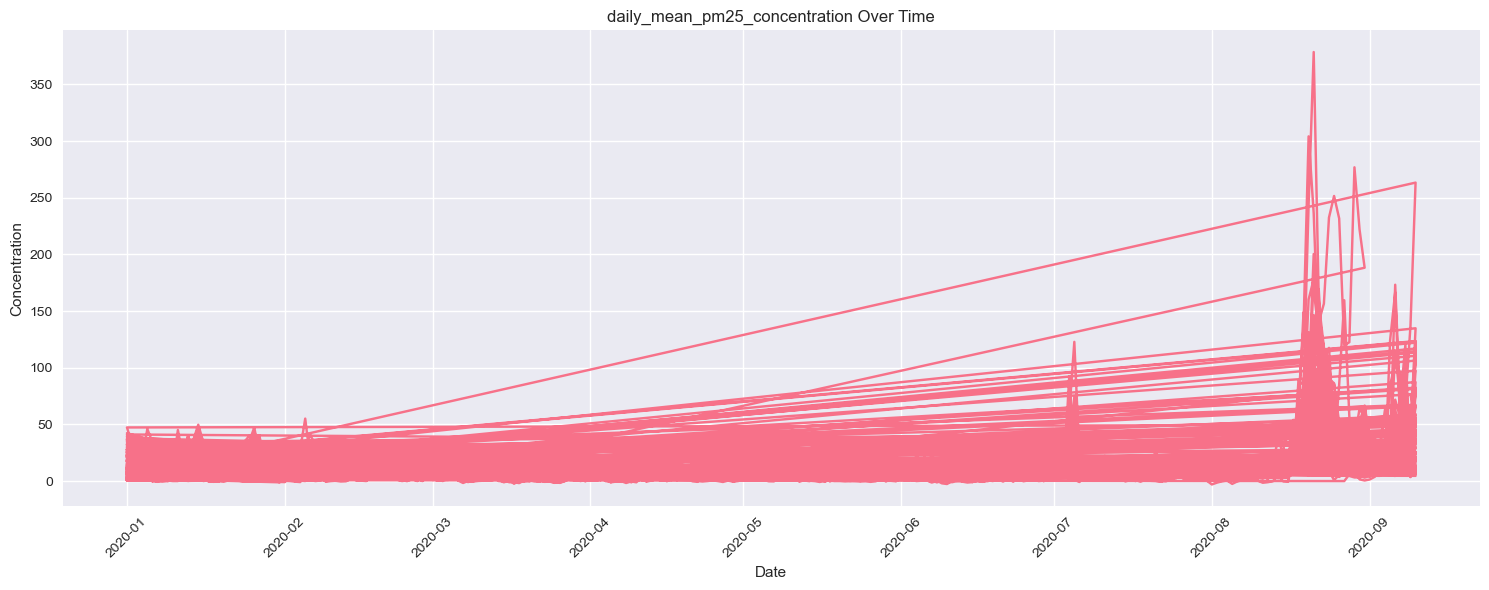

In [11]:
def plot_time_series(df, pollutant):
    plt.figure(figsize=(15, 6))
    plt.plot(df['date'], df[pollutant])     # <-- use 'date' here
    plt.title(f'{pollutant} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.xticks(rotation=45)
    plt.tight_layout()
    # plt.savefig(f'{pollutant}_time_series.png')
    plt.show()

# And pass your snake_case pollutant name:
plot_time_series(df, 'daily_mean_pm25_concentration')


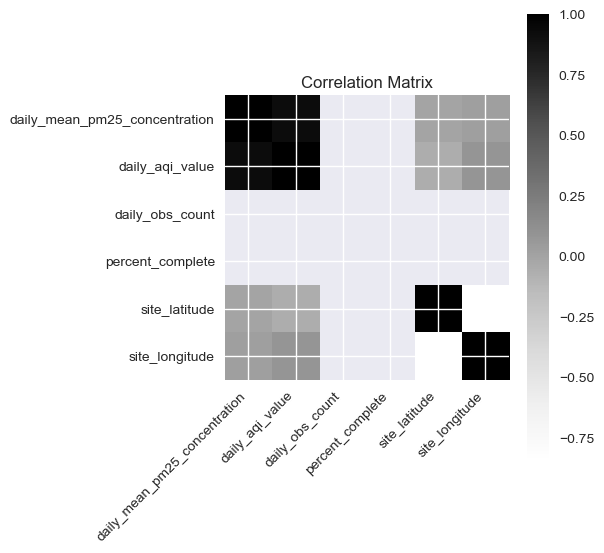

In [12]:
import matplotlib.pyplot as plt

# 1) define which columns you want
num = [
    'daily_mean_pm25_concentration','daily_aqi_value',
    'daily_obs_count','percent_complete',
    'site_latitude','site_longitude'
]

# 2) compute the correlation matrix
corr = df[num].corr()

# 3) plot via the OO API
fig, ax = plt.subplots(figsize=(6,6))
cax = ax.imshow(corr, interpolation='nearest')
fig.colorbar(cax)
ax.set_xticks(range(len(num)))
ax.set_xticklabels(num, rotation=45, ha='right')
ax.set_yticks(range(len(num)))
ax.set_yticklabels(num)
ax.set_title("Correlation Matrix")
fig.tight_layout()

# 4) save and show
# fig.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


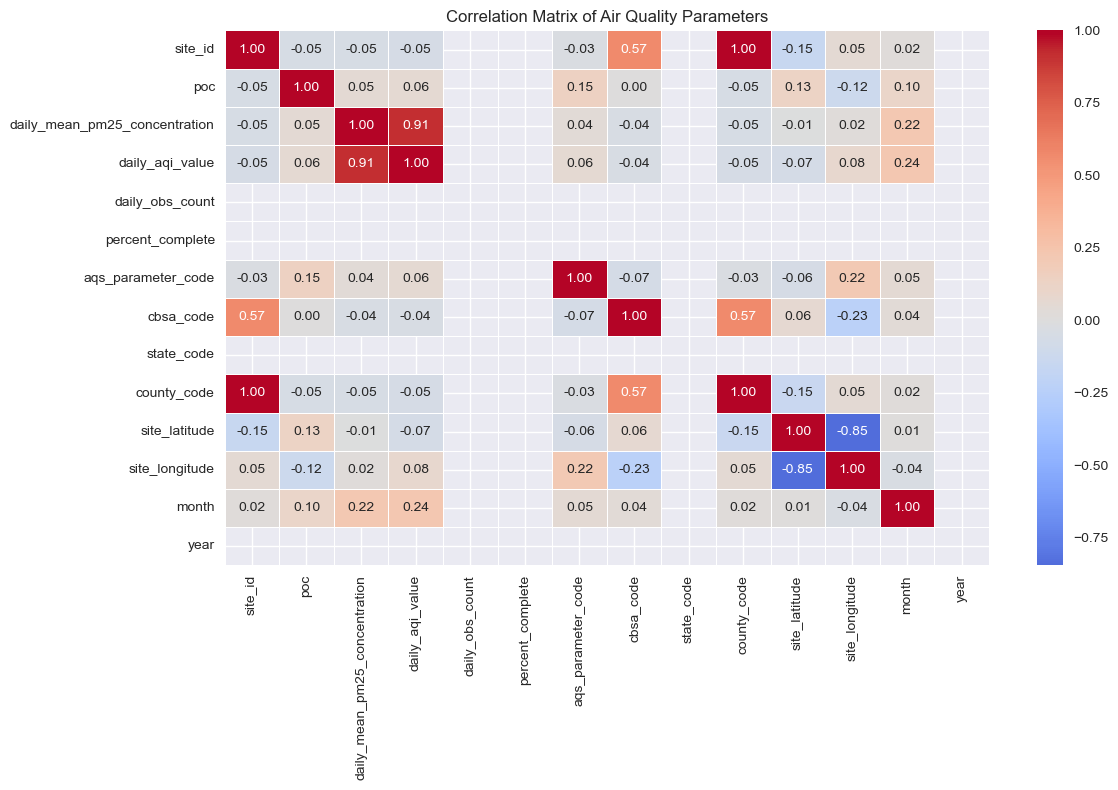

In [13]:
# Create a function for correlation analysis
def plot_correlation_matrix(df):
    # Pick only the numeric columns
    num_df = df.select_dtypes(include=[np.number])

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        num_df.corr(),
        annot=True,
        cmap='coolwarm',
        center=0,
        fmt=".2f",
        linewidths=0.5
    )
    plt.title('Correlation Matrix of Air Quality Parameters')
    plt.tight_layout()
    # plt.savefig('correlation_matrix.png')  # optional
    plt.show()

# finally, run it:
plot_correlation_matrix(df)


In [14]:
# Create a function for distribution analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    n = len(numeric_columns)
    # grab n distinct colors
    colors = sns.color_palette("husl", n)

    n_cols = 2
    n_rows = (n + 1) // 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_columns):
        sns.histplot(
            data=df,
            x=col,
            kde=True,
            ax=axes[idx],
            color=colors[idx]  # assign unique color
        )
        axes[idx].set_title(f'Distribution of {col}')

    # remove any empty subplots
    for idx in range(n, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    # plt.savefig('distributions_colored.png')
    plt.show()



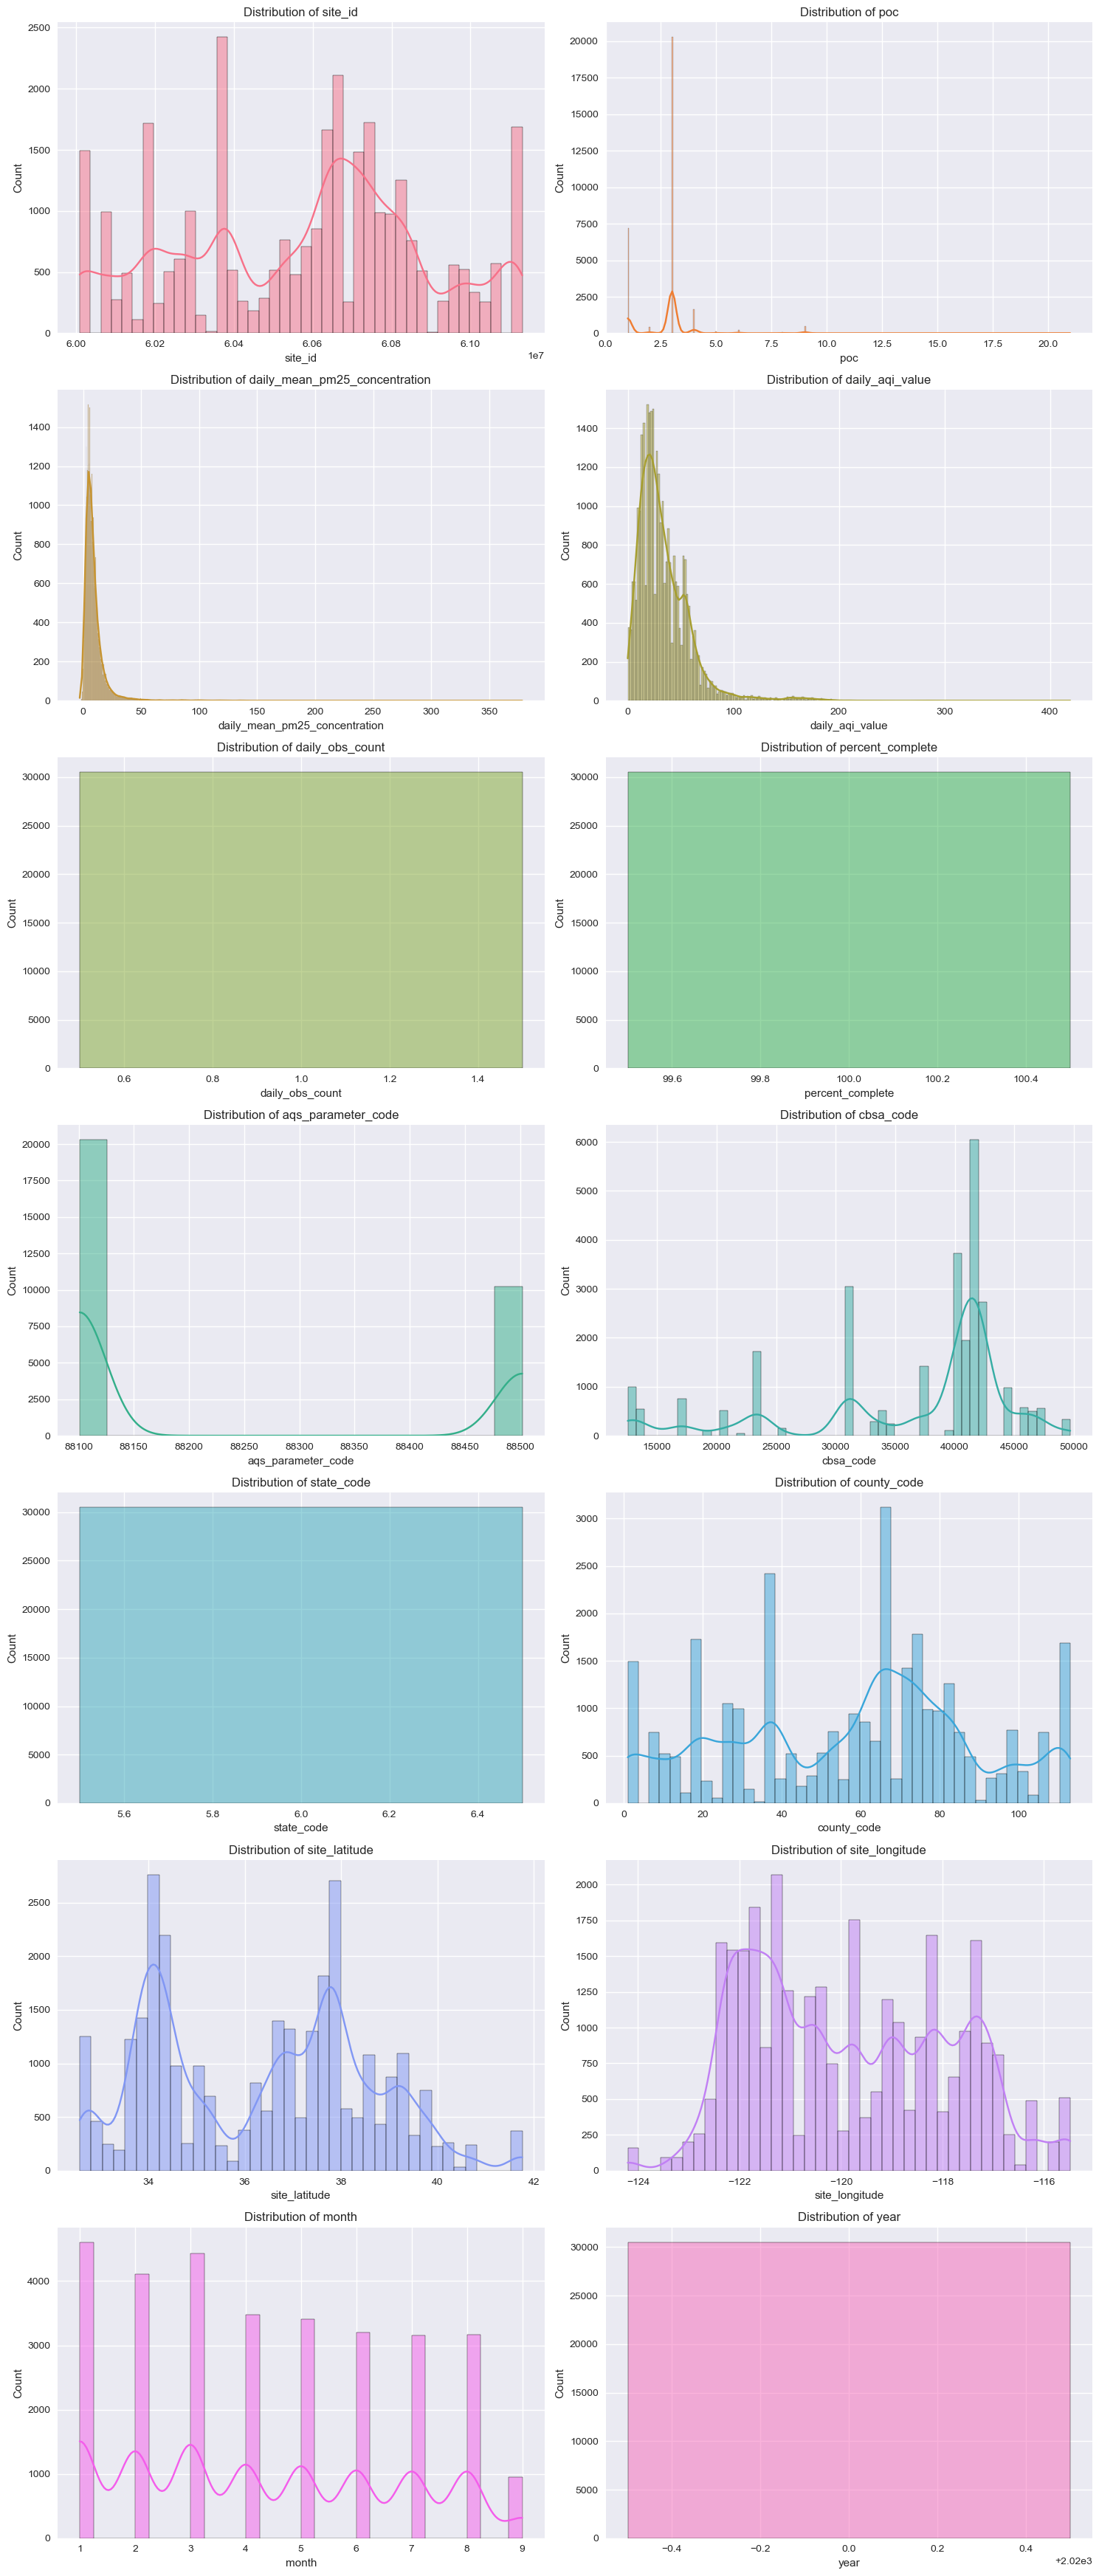

In [15]:
plot_distributions(df)


In [16]:
# Create a function for box plots
def plot_boxplots(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    plt.figure(figsize=(15, 8))
    df[numeric_columns].boxplot()
    plt.title('Box Plots of Air Quality Parameters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    # plt.savefig('boxplots.png')
    plt.show()      # ← this forces inline display
    plt.close()


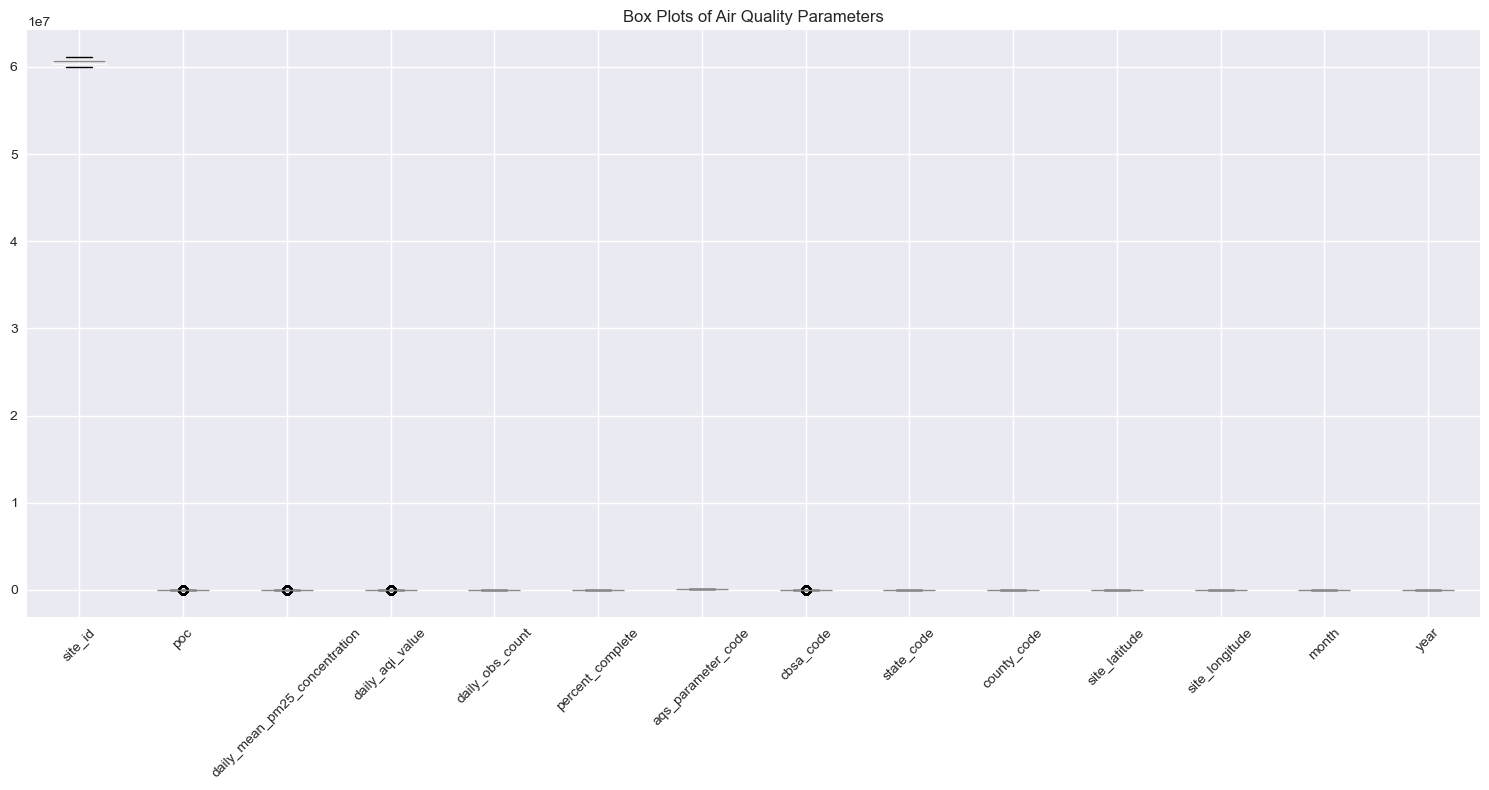

In [17]:
plot_boxplots(df)


In [18]:
for col in ['daily_mean_pm25_concentration','daily_aqi_value','daily_obs_count',
            'percent_complete','site_latitude','site_longitude']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['site_name'] = df['site_name'].fillna('Unknown')
df.dropna(subset=['daily_mean_pm25_concentration','daily_aqi_value'], inplace=True)


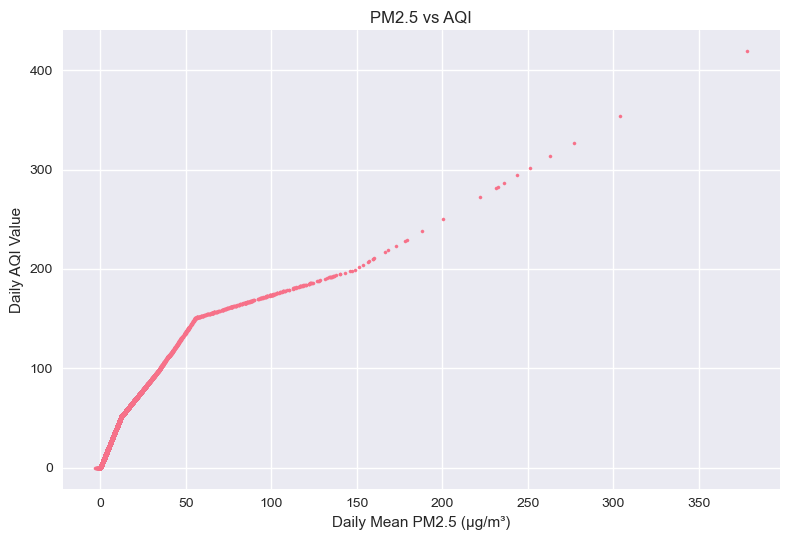

In [19]:
# 2) PM2.5 vs AQI scatter
# 2) PM2.5 vs AQI scatter
plt.figure()
plt.scatter(df['daily_mean_pm25_concentration'],
            df['daily_aqi_value'],
            s=5)
plt.title("PM2.5 vs AQI")
plt.xlabel("Daily Mean PM2.5 (µg/m³)")
plt.ylabel("Daily AQI Value")
plt.tight_layout()

# ← Add this line to write out the PNG
# plt.savefig("pm25_vs_aqi_scatter.png", dpi=300, bbox_inches="tight")

plt.show()


/var/folders/ch/501q6vqd6s10pmgmd7ytk7ph0000gp/T/ipykernel_55985/2038428631.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_month, labels=range(1,13))


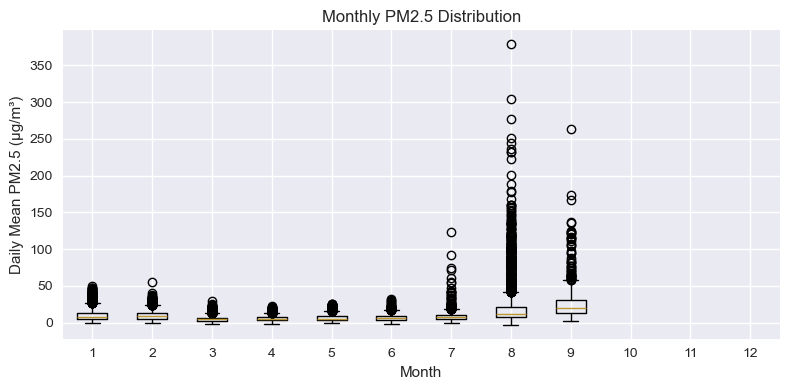

In [20]:
# 2) Parse the date
# 5) Monthly PM2.5 boxplots
data_by_month = [
    df.loc[df['month'] == m, 'daily_mean_pm25_concentration']
      .dropna()
    for m in range(1, 13)
]

plt.figure(figsize=(8,4))
plt.boxplot(data_by_month, labels=range(1,13))
plt.title("Monthly PM2.5 Distribution")
plt.xlabel("Month")
plt.ylabel("Daily Mean PM2.5 (µg/m³)")
plt.tight_layout()

# ← Save the figure to disk
# plt.savefig("monthly_pm25_boxplot.png", dpi=300, bbox_inches="tight")

# ← Then display it inline
plt.show()


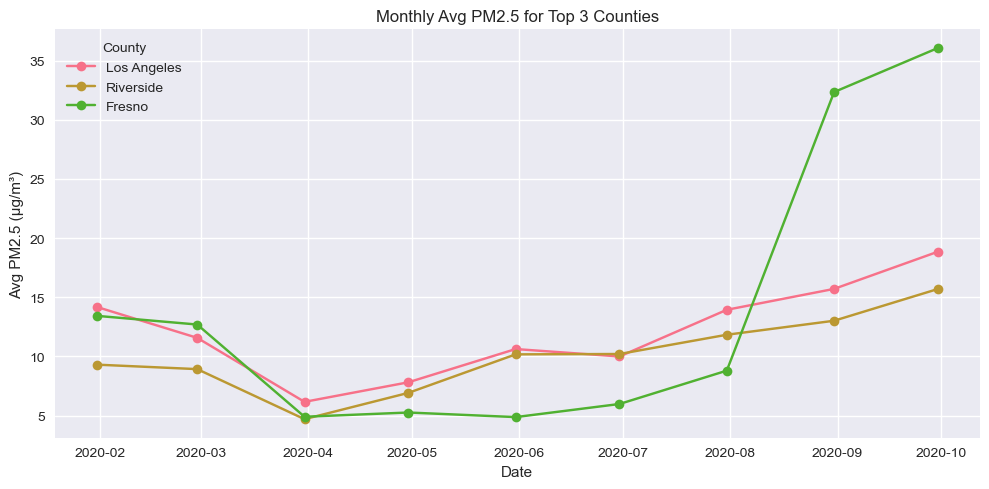

In [21]:
# 5) Monthly trend for top-3 counties
top3 = (
    df['county']
      .value_counts()
      .nlargest(3)
      .index
      .tolist()
)

plt.figure(figsize=(10, 5))

for county in top3:
    ts = (
        df.loc[df['county'] == county]
          .set_index('date')['daily_mean_pm25_concentration']
          .resample('ME')
          .mean()
    )
    plt.plot(ts.index, ts.values, marker='o', label=county)

plt.title("Monthly Avg PM2.5 for Top 3 Counties")
plt.xlabel("Date")
plt.ylabel("Avg PM2.5 (µg/m³)")
plt.legend(title="County")
plt.tight_layout()

# ← Save to disk
# plt.savefig("top3_counties_pm25_trend.png", dpi=300, bbox_inches="tight")

# ← Then render inline
plt.show()













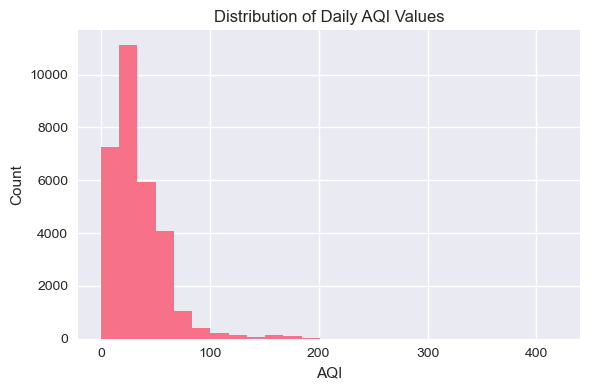

In [22]:
# 6) AQI distribution + PM2.5 > “unhealthy” days
plt.figure(figsize=(6,4))
plt.hist(df['daily_aqi_value'], bins=25)
plt.title("Distribution of Daily AQI Values")
plt.xlabel("AQI")
plt.ylabel("Count")
plt.tight_layout()

# ← Save the figure before showing
# plt.savefig("aqi_distribution.png", dpi=300, bbox_inches="tight")

plt.show()


In [23]:
# mark days above AQI 100
unhealthy = df[df['daily_aqi_value'] > 100].shape[0]
total_days = df.shape[0]
print(f"Days with AQI>100: {unhealthy} ({unhealthy/total_days:.1%} of all records)")


Days with AQI>100: 698 (2.3% of all records)


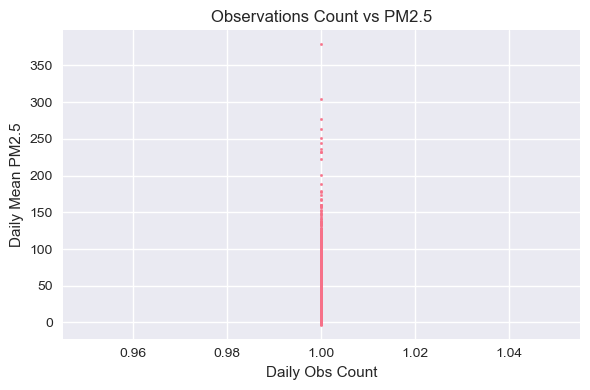

In [24]:
# 7) PM2.5 vs obs count (data completeness check)
plt.figure(figsize=(6,4))
plt.scatter(
    df['daily_obs_count'],
    df['daily_mean_pm25_concentration'],
    s=3
)
plt.title("Observations Count vs PM2.5")
plt.xlabel("Daily Obs Count")
plt.ylabel("Daily Mean PM2.5")
plt.tight_layout()

# ← Save to disk before you render
# plt.savefig("obs_count_vs_pm25.png", dpi=300, bbox_inches="tight")

plt.show()


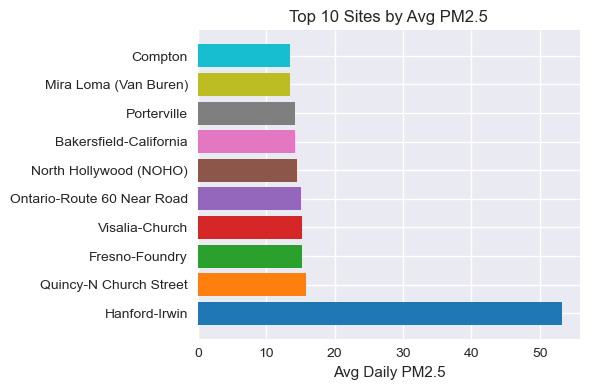

In [25]:
# 8) Top 10 sites by average PM2.5
# Top 10 Sites by Avg PM2.5 with save
import matplotlib.pyplot as plt
import seaborn as sns

site_avg = (
    df.groupby('site_name')['daily_mean_pm25_concentration']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

# grab 10 distinct colors
colors = sns.color_palette("tab10", n_colors=len(site_avg))

plt.figure(figsize=(6,4))
plt.barh(site_avg.index, site_avg.values, color=colors)
plt.title("Top 10 Sites by Avg PM2.5")
plt.xlabel("Avg Daily PM2.5")
plt.tight_layout()

# plt.savefig("top10_sites_avg_pm25_colored.png", dpi=300, bbox_inches="tight")
plt.show()


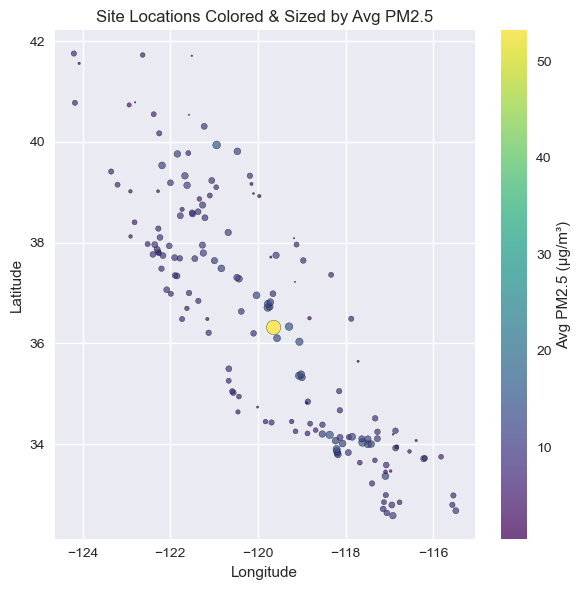

In [26]:
# 9) Geospatial scatter (lat vs lon, sized by avg PM2.5) with save
import matplotlib.pyplot as plt
import seaborn as sns
loc_avg = (
    df.groupby(['site_latitude','site_longitude'])['daily_mean_pm25_concentration']
      .mean()
      .reset_index()
)

plt.figure(figsize=(6,6))
# use PM2.5 values to drive both size and color
sizes = loc_avg['daily_mean_pm25_concentration'] * 2
colors = loc_avg['daily_mean_pm25_concentration']

sc = plt.scatter(
    loc_avg['site_longitude'],
    loc_avg['site_latitude'],
    s=sizes,
    c=colors,
    cmap='viridis',      # or any seaborn/matplotlib palette
    alpha=0.7,
    edgecolor='k',
    linewidth=0.3
)
plt.colorbar(sc, label='Avg PM2.5 (µg/m³)')
plt.title("Site Locations Colored & Sized by Avg PM2.5")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()

# save then show
# plt.savefig("site_locations_pm25_scatter_colored.png", dpi=300, bbox_inches="tight")
plt.show()


/var/folders/ch/501q6vqd6s10pmgmd7ytk7ph0000gp/T/ipykernel_55985/1638403933.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


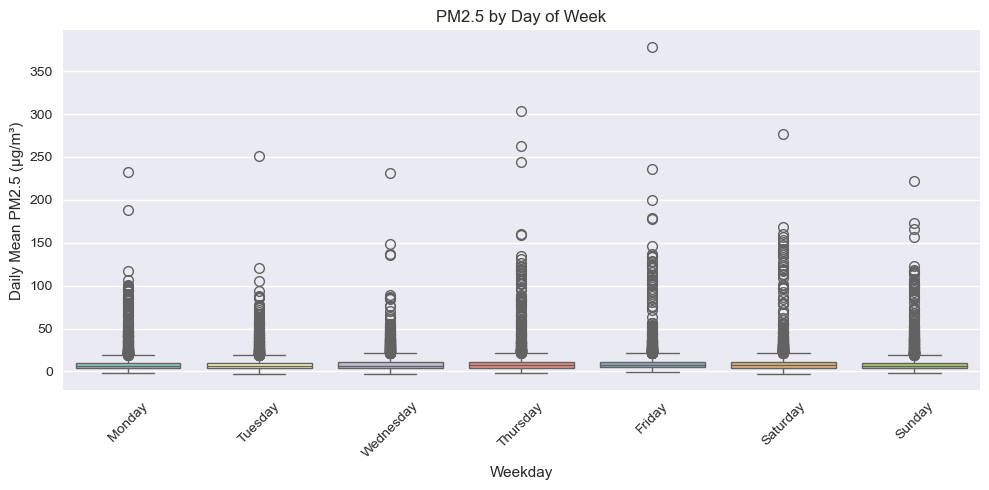

In [27]:
# 10) Weekly pattern: extract weekday and boxplot with save
df['weekday'] = df['date'].dt.day_name()
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(10, 5))
sns.boxplot(
    x='weekday',
    y='daily_mean_pm25_concentration',
    data=df,
    order=order,
    palette='Set3'    # try any seaborn palette: Set2, tab10, viridis, etc.
)
plt.title("PM2.5 by Day of Week")
plt.xlabel("Weekday")
plt.ylabel("Daily Mean PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()

# save and show
# plt.savefig("weekly_pm25_by_weekday_colored.png", dpi=300, bbox_inches="tight")
plt.show()

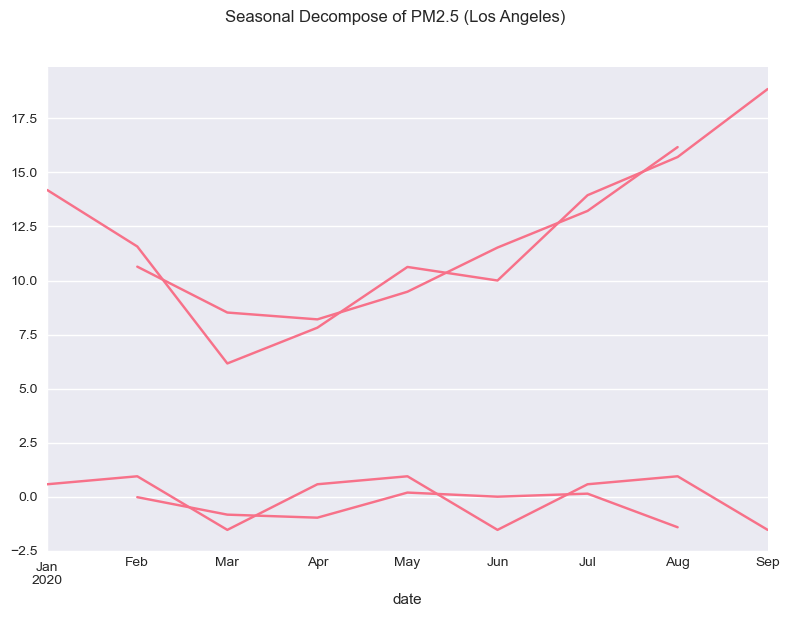

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 12) Seasonal decomposition for one county (monthly series)
county = 'Los Angeles'
ts = (
    df.loc[df['county'] == county]
      .set_index('date')['daily_mean_pm25_concentration']
      .resample('MS')   # month start
      .mean()
)

# decompose with quarterly seasonality (period=3)
decomp = seasonal_decompose(ts, model='additive', period=3)

# plot all components
plt.figure(figsize=(8, 6))
decomp.observed .plot(subplots=True, legend=False)
decomp.trend     .plot(subplots=True, legend=False)
decomp.seasonal  .plot(subplots=True, legend=False)
decomp.resid     .plot(subplots=True, legend=False)

plt.suptitle(f"Seasonal Decompose of PM2.5 ({county})", y=1.02)
plt.tight_layout()

# ← Save the composite figure before showing
# plt.savefig("seasonal_decompose_LosAngeles.png", dpi=300, bbox_inches="tight")

plt.show()


# Final Analysis & Key Findings

## Summary of Analysis

- **Data Cleaning:**  
  The dataset was cleaned by removing duplicates, handling missing values, and standardizing column names. The 'Date' column was converted to datetime format for time series analysis.

- **Descriptive Statistics:**  
  - PM2.5 and AQI values show right-skewed distributions with several outliers.
  - The mean and median values indicate that most days have moderate air quality, but there are periods of high pollution.

- **Temporal Trends:**  
  - Clear seasonal patterns were observed, with PM2.5 and AQI peaking during certain months, likely due to wildfires or weather conditions.
  - Rolling averages and time series decomposition revealed both long-term trends and seasonal cycles.

- **Geographic Patterns:**  
  - Some counties consistently report higher PM2.5 concentrations, indicating regional pollution hotspots.
  - County-wise analysis highlighted areas that may require targeted interventions.

- **Correlation Analysis:**  
  - There is a strong positive correlation between PM2.5 concentration and AQI, as expected.
  - Other numeric variables showed varying degrees of correlation, but PM2.5 remains the primary driver of AQI.

- **Outlier & Distribution Analysis:**  
  - Outliers were detected, especially during known pollution events.
  - Distribution fitting and Q-Q plots confirmed that both PM2.5 and AQI deviate from normality.

## Recommendations

- **Policy & Public Health:**  
  - Focus air quality improvement efforts on counties with persistently high PM2.5 levels.
  - Issue public health advisories during high pollution months to protect vulnerable populations.

- **Further Analysis:**  
  - Investigate the causes of outliers and high pollution events (e.g., wildfires, industrial activity).
  - Use the cleaned and analyzed data for predictive modeling or forecasting future air quality trends.

- **Community Engagement:**  
  - Educate the public about seasonal air quality patterns and encourage actions to reduce exposure during high-risk periods.

---

In [29]:

print(df.columns.tolist())


['date', 'source', 'site_id', 'poc', 'daily_mean_pm25_concentration', 'units', 'daily_aqi_value', 'site_name', 'daily_obs_count', 'percent_complete', 'aqs_parameter_code', 'aqs_parameter_desc', 'cbsa_code', 'cbsa_name', 'state_code', 'state', 'county_code', 'county', 'site_latitude', 'site_longitude', 'month', 'year', 'month_name', 'weekday']


In [30]:
aqi = df.copy()

In [31]:
aqi.columns = aqi.columns.str.strip()

In [32]:
cols_to_drop = [
    "Source", "Site ID", "POC", "UNITS",
    "AQS_PARAMETER_CODE", "AQS_PARAMETER_DESC",
    "CBSA_CODE", "CBSA_NAME",
    "STATE_CODE", "COUNTY_CODE",
    "SITE_LATITUDE", "SITE_LONGITUDE"
]
aqi.drop(columns=cols_to_drop, inplace=True, errors="ignore")


In [33]:
# rename it to exactly "Date"
aqi.rename(columns={"date":"Date", " Date":"Date"}, inplace=True)

# now set it as your datetime index
aqi["Date"] = pd.to_datetime(aqi["Date"], infer_datetime_format=True)
aqi.set_index("Date", inplace=True)
aqi["month"] = aqi.index.month


/var/folders/ch/501q6vqd6s10pmgmd7ytk7ph0000gp/T/ipykernel_55985/193214545.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aqi["Date"] = pd.to_datetime(aqi["Date"], infer_datetime_format=True)


In [34]:
print(aqi.columns.tolist())
print(aqi.index.names, aqi.index[:5])


['source', 'site_id', 'poc', 'daily_mean_pm25_concentration', 'units', 'daily_aqi_value', 'site_name', 'daily_obs_count', 'percent_complete', 'aqs_parameter_code', 'aqs_parameter_desc', 'cbsa_code', 'cbsa_name', 'state_code', 'state', 'county_code', 'county', 'site_latitude', 'site_longitude', 'month', 'year', 'month_name', 'weekday']
['Date'] DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [35]:
numeric_cols = [
    "daily_mean_pm25_concentration",
    "daily_aqi_value",
    "daily_obs_count",
    "percent_complete",
    "month"
]
cat_col = "county"



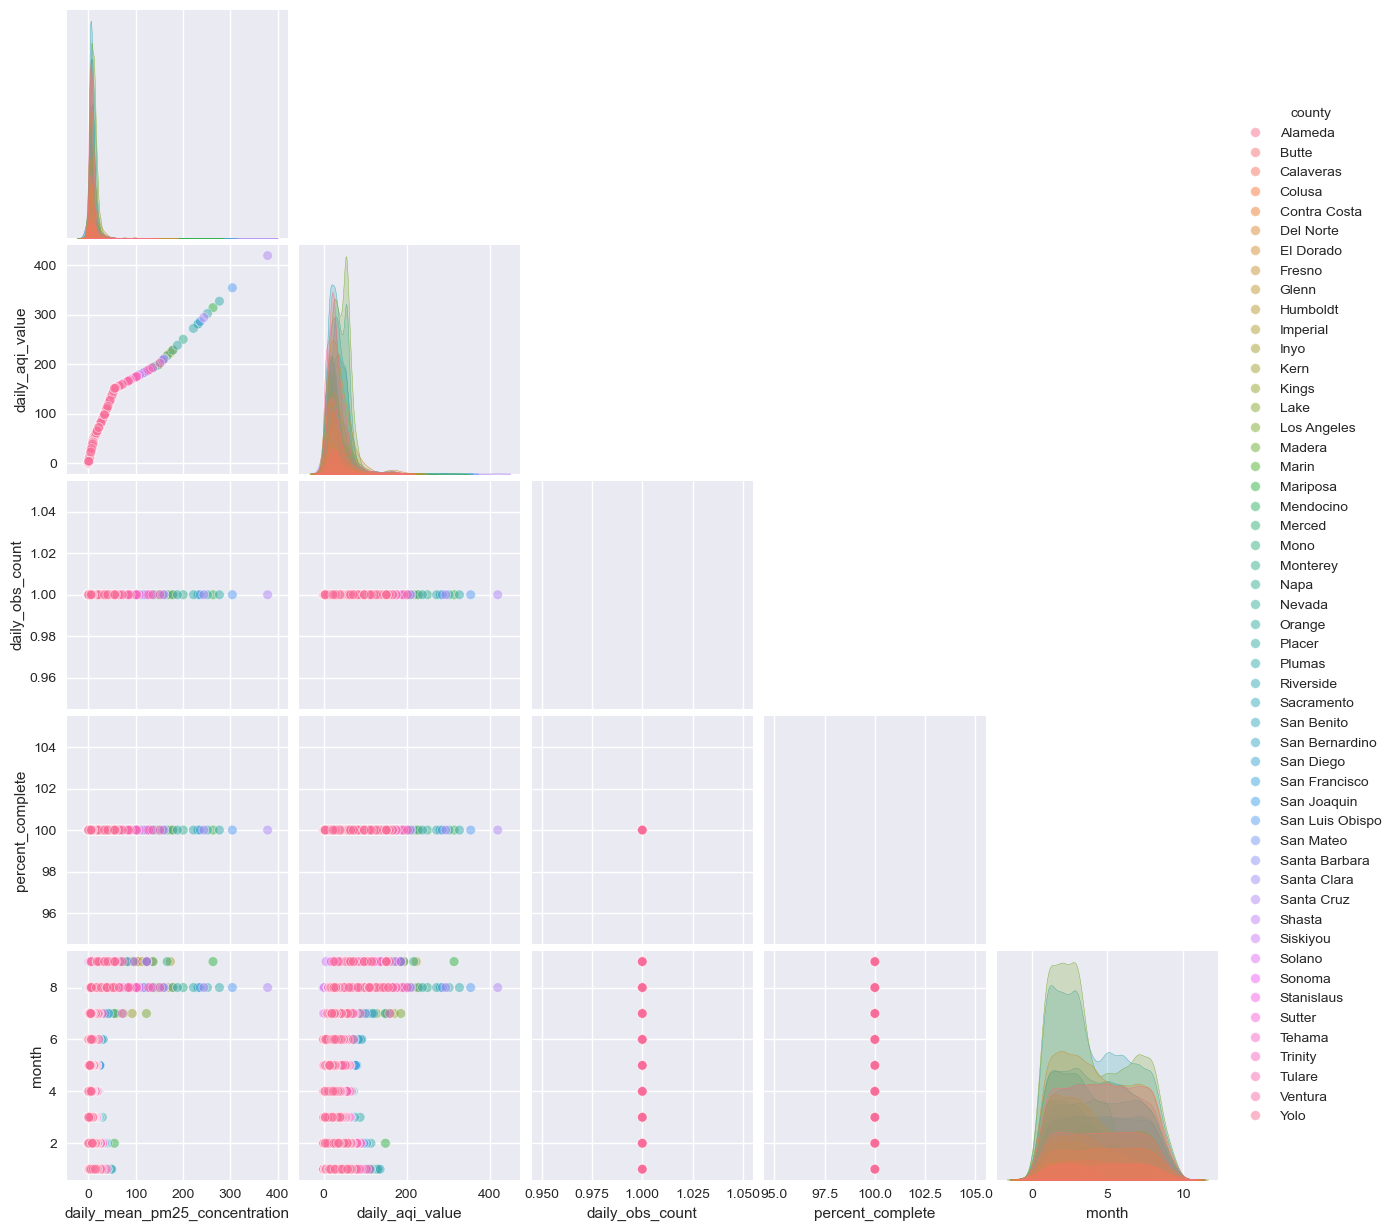

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    aqi[numeric_cols + [cat_col]],
    hue=cat_col,
    corner=True,
    plot_kws={"alpha": 0.5}
)
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8325 (\N{SUBSCRIPT FIVE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


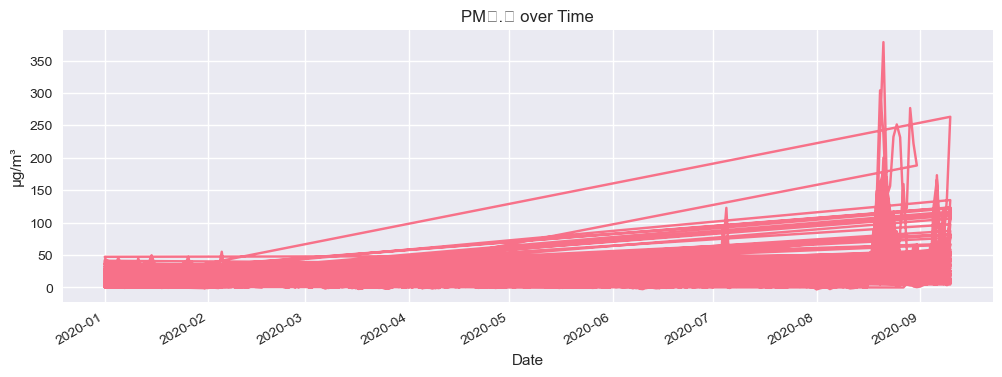

In [37]:
aqi.rename(
    columns={'daily_mean_pm25_concentration':'Daily Mean PM2.5 Concentration'},
    inplace=True
)

aqi['Daily Mean PM2.5 Concentration'].plot(figsize=(12,4))
plt.title("PM₂.₅ over Time")
plt.ylabel("µg/m³")
plt.show()


In [38]:
print(aqi.columns.tolist())


['source', 'site_id', 'poc', 'Daily Mean PM2.5 Concentration', 'units', 'daily_aqi_value', 'site_name', 'daily_obs_count', 'percent_complete', 'aqs_parameter_code', 'aqs_parameter_desc', 'cbsa_code', 'cbsa_name', 'state_code', 'state', 'county_code', 'county', 'site_latitude', 'site_longitude', 'month', 'year', 'month_name', 'weekday']


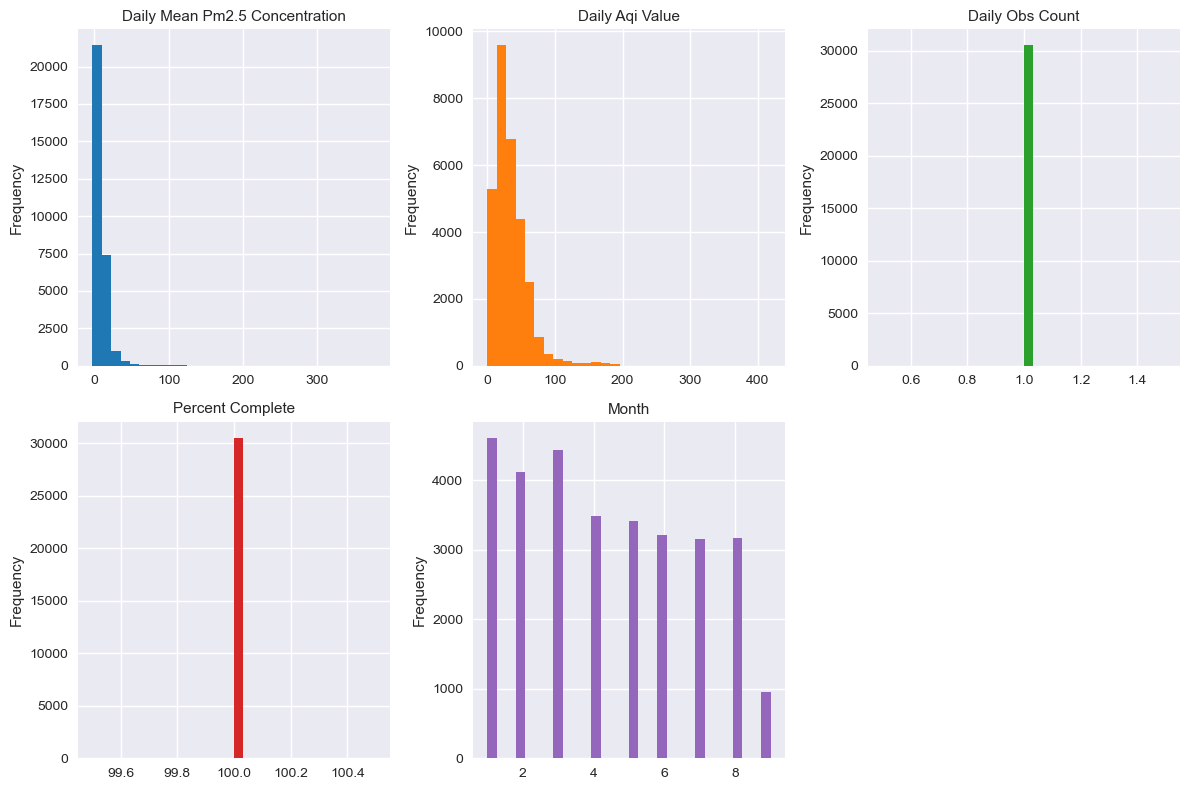

In [39]:
import matplotlib.pyplot as plt

numeric_cols = [
    "Daily Mean PM2.5 Concentration",
    "daily_aqi_value",
    "daily_obs_count",
    "percent_complete",
    "month"
]

colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple"]

fig, axes = plt.subplots(2, 3, figsize=(12,8))
axes = axes.flatten()

for ax, col, c in zip(axes, numeric_cols, colors):
    # dropna() just to avoid any NaNs sneaking in
    ax.hist(aqi[col].dropna(), bins=30, color=c)
    ax.set_title(col.replace('_',' ').title(), fontsize=11)
    ax.set_ylabel("Frequency")
    ax.set_xlabel("")  # or set a nicer label here

# turn off the 6th (empty) subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()






In [40]:
print("Wanted:", numeric_cols)
print("Have: ", aqi.columns.tolist())


Wanted: ['Daily Mean PM2.5 Concentration', 'daily_aqi_value', 'daily_obs_count', 'percent_complete', 'month']
Have:  ['source', 'site_id', 'poc', 'Daily Mean PM2.5 Concentration', 'units', 'daily_aqi_value', 'site_name', 'daily_obs_count', 'percent_complete', 'aqs_parameter_code', 'aqs_parameter_desc', 'cbsa_code', 'cbsa_name', 'state_code', 'state', 'county_code', 'county', 'site_latitude', 'site_longitude', 'month', 'year', 'month_name', 'weekday']


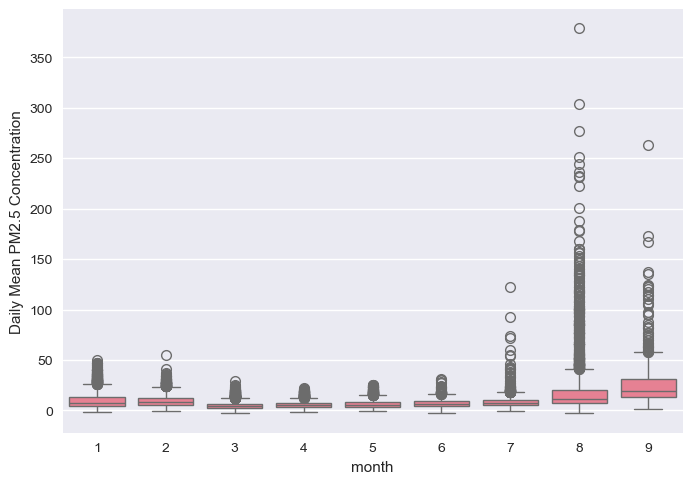

In [41]:
sns.boxplot(
  data=aqi, 
  x="month", 
  y="Daily Mean PM2.5 Concentration"
)
plt.show()


### Train Test Split

In [42]:
 # 1) Make sure your date column matches exactly
#    (use lowercase 'date' if you ran the snake_case renaming)
df = df.sort_values('date')  

# 2) Define the split index (80% train, 20% test)
split_index = int(len(df) * 0.8)

# 3) Features and target with the right names
X = df[['daily_mean_pm25_concentration']]  
y = df['daily_aqi_value']

# 4) Time-based split
X_train_time = X.iloc[:split_index]
X_test_time  = X.iloc[split_index:]
y_train_time = y.iloc[:split_index]
y_test_time  = y.iloc[split_index:]

print("Time-based Train set size:", X_train_time.shape)
print("Time-based Test set size: ", X_test_time.shape)


Time-based Train set size: (24412, 1)
Time-based Test set size:  (6103, 1)


In [43]:
from sklearn.model_selection import train_test_split

X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Random Train set size:", X_train_rand.shape)
print("Random Test set size:", X_test_rand.shape)

Random Train set size: (24412, 1)
Random Test set size: (6103, 1)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_time = LinearRegression()
model_time.fit(X_train_time, y_train_time)
y_pred_time = model_time.predict(X_test_time)

mse_time = mean_squared_error(y_test_time, y_pred_time)
r2_time = r2_score(y_test_time, y_pred_time)

print(f"Time-based Split - Mean Squared Error: {mse_time:.2f}")
print(f"Time-based Split - R^2 Score: {r2_time:.3f}")

Time-based Split - Mean Squared Error: 1702.03
Time-based Split - R^2 Score: -0.099


In [45]:
model_rand = LinearRegression()
model_rand.fit(X_train_rand, y_train_rand)
y_pred_rand = model_rand.predict(X_test_rand)

mse_rand = mean_squared_error(y_test_rand, y_pred_rand)
r2_rand = r2_score(y_test_rand, y_pred_rand)

print(f"Random Split - Mean Squared Error: {mse_rand:.2f}")
print(f"Random Split - R^2 Score: {r2_rand:.3f}")

Random Split - Mean Squared Error: 100.13
Random Split - R^2 Score: 0.847


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1) Random split
X = df[['daily_mean_pm25_concentration','daily_obs_count','month']]
y = df['daily_aqi_value']
X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) Train
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_rand, y_train_rand)

# 3) Predict
y_pred_rand = model.predict(X_test_rand)


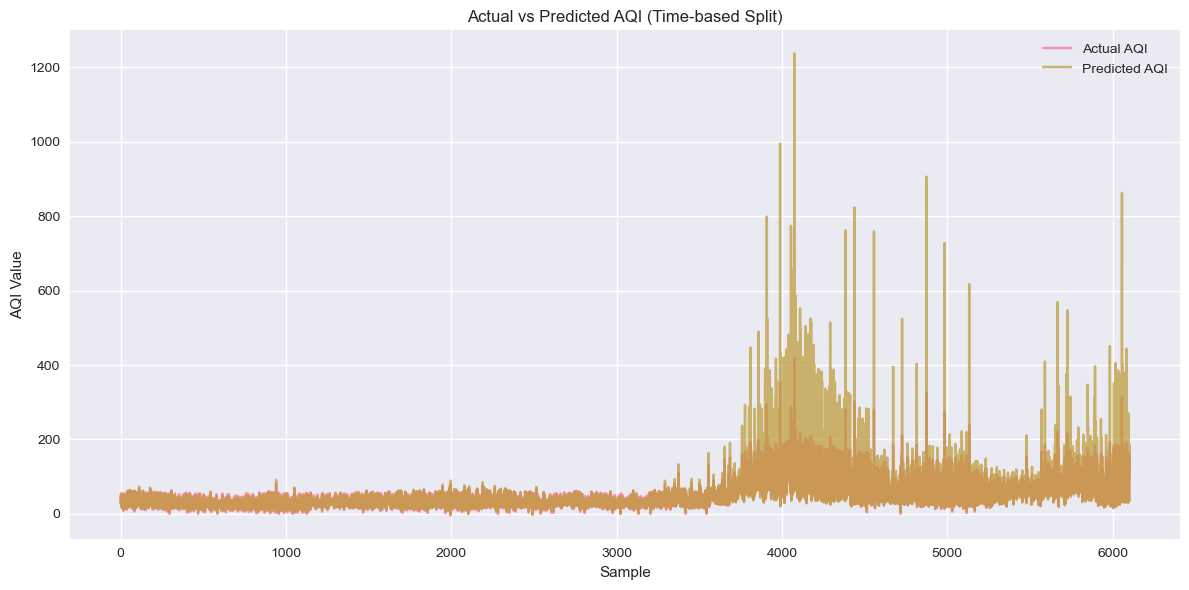

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_time.values, label='Actual AQI', alpha=0.7)
plt.plot(y_pred_time, label='Predicted AQI', alpha=0.7)
plt.title('Actual vs Predicted AQI (Time-based Split)')
plt.xlabel('Sample')
plt.ylabel('AQI Value')
plt.legend()
plt.tight_layout()
plt.show()

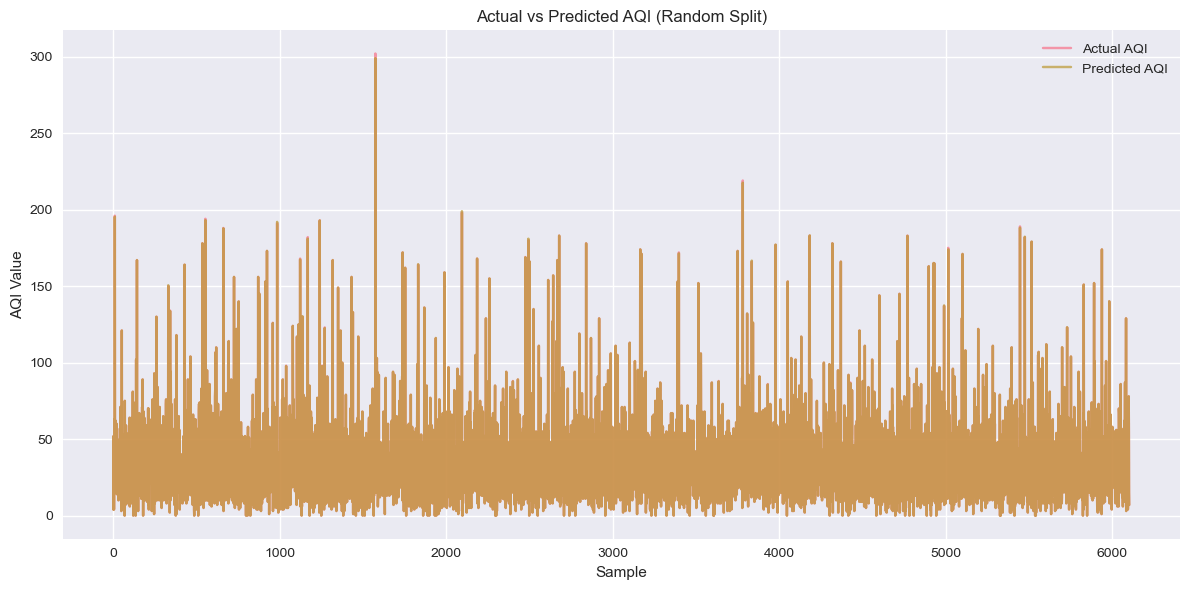

In [48]:
plt.figure(figsize=(12,6))
plt.plot(y_test_rand.values, label='Actual AQI', alpha=0.7)
plt.plot(y_pred_rand, label='Predicted AQI', alpha=0.7)
plt.title('Actual vs Predicted AQI (Random Split)')
plt.xlabel('Sample')
plt.ylabel('AQI Value')
plt.legend()
plt.tight_layout()
plt.show()

### Feature Engineering

In [49]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [50]:
# 1) Decide what your “X” and “y” are
#    Let’s say you want to predict daily_mean_pm25_concentration
y = aqi["Daily Mean PM2.5 Concentration"]
X = aqi.drop(columns=["Daily Mean PM2.5 Concentration"])


In [51]:
# 2) Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [52]:
# 3) Define which columns are numeric vs. categorical
numeric_columns = [
    "daily_aqi_value",
    "daily_obs_count",
    "percent_complete",
    "month"
]

In [53]:
categorical_columns = ["county", "site_name"]  # pick whatever object/categorical cols you need

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_columns),
        # use sparse_output=False, not sparse=False
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_columns),
    ],
    remainder="drop"
)

In [54]:
# 5) Fit + transform your train, then transform your test
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)


In [55]:
# 6) Recover the feature names so you can wrap it in a DataFrame
num_names = numeric_columns
cat_names = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_columns)
all_feature_names = list(num_names) + list(cat_names)

In [56]:


X_train_df = pd.DataFrame(X_train_proc, columns=all_feature_names, index=X_train.index)
X_test_df  = pd.DataFrame(X_test_proc,  columns=all_feature_names, index=X_test.index)


In [57]:
# 7) Peek at it
print(X_train_df.shape)
X_train_df.head()


(24412, 214)


,daily_aqi_value,daily_obs_count,percent_complete,month,county_Butte,county_Calaveras,county_Colusa,county_Contra Costa,county_Del Norte,county_El Dorado,...,site_name_Visalia-Church,site_name_Weaverville-Courthouse,site_name_White Mountain Research Center - Owens Valley Lab,site_name_Willits-125 East Commercial Street,site_name_Willows-Colusa Street,site_name_Woodland-Gibson Road,site_name_Yosemite NP - Turtleback Dome,site_name_Yosemite NP-Yosemite Village Vistor Center,site_name_Yreka,site_name_Yuba City
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-15,-0.810131,0.0,0.0,-0.554827,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-28,-0.072679,0.0,0.0,-0.140053,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-19,-0.266745,0.0,0.0,-1.384374,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-01,-0.810131,0.0,0.0,-0.140053,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-12,-0.732505,0.0,0.0,-1.384374,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
print(X_test_df.shape)
X_test_df.head()

(6103, 214)


,daily_aqi_value,daily_obs_count,percent_complete,month,county_Butte,county_Calaveras,county_Colusa,county_Contra Costa,county_Del Norte,county_El Dorado,...,site_name_Visalia-Church,site_name_Weaverville-Courthouse,site_name_White Mountain Research Center - Owens Valley Lab,site_name_Willits-125 East Commercial Street,site_name_Willows-Colusa Street,site_name_Woodland-Gibson Road,site_name_Yosemite NP - Turtleback Dome,site_name_Yosemite NP-Yosemite Village Vistor Center,site_name_Yreka,site_name_Yuba City
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-27,-0.460812,0.0,0.0,-0.969600,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-26,0.004948,0.0,0.0,0.274720,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-06-30,-0.499625,0.0,0.0,0.689494,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-23,-1.159451,0.0,0.0,1.104267,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-29,-0.732505,0.0,0.0,-0.140053,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Regression Modeling 

/var/folders/ch/501q6vqd6s10pmgmd7ytk7ph0000gp/T/ipykernel_55985/2263489374.py:15: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/ch/501q6vqd6s10pmgmd7ytk7ph0000gp/T/ipykernel_55985/2263489374.py:15: UserWarning: Glyph 8325 (\N{SUBSCRIPT FIVE}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8325 (\N{SUBSCRIPT FIVE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


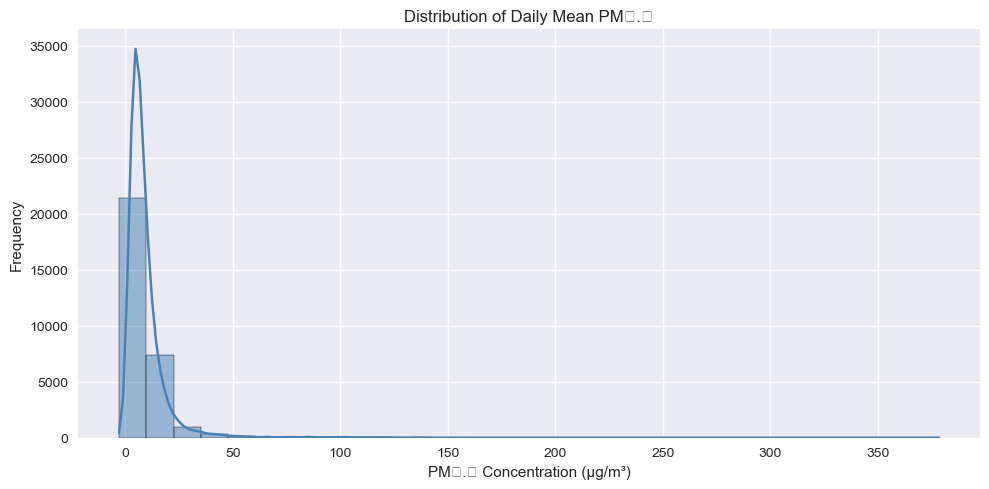

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(
    data=aqi,
    x="Daily Mean PM2.5 Concentration",  # or 'daily_mean_pm25_concentration' if you normalized names
    bins=30,
    kde=True,
    color="steelblue"
)
plt.xlabel("PM₂.₅ Concentration (µg/m³)")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Mean PM₂.₅")
plt.tight_layout()
plt.show()


In [60]:
aqi["Daily Mean PM2.5 Concentration"].describe()

count    30515.000000
mean         9.355809
std         12.029893
min         -3.000000
25%          4.100000
50%          6.700000
75%         10.800000
max        378.500000
Name: Daily Mean PM2.5 Concentration, dtype: float64

In [61]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# 1) build an array of the training‐set mean repeated for every test sample
baseline_pred = np.full(shape=y_test.shape, fill_value=y_train.mean())

# 2) compute RMSE
rmse_baseline = np.sqrt(mean_squared_error(y_test, baseline_pred))

# 3) compute R²
r2_baseline = r2_score(y_test, baseline_pred)

print(f"Baseline RMSE: {rmse_baseline:.3f}")
print(f"Baseline R²:  {r2_baseline:.3f}")


Baseline RMSE: 12.701
Baseline R²:  -0.000


. Linear Regression

. Lasso Regresion

. Decision Tree

. Ranfom Forest

. Gradient Boosting

. XGBoost

. Multi-layer perceptron


In [62]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold

In [63]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_jobs=-1),
    "Multi-layer Perceptron": MLPRegressor(max_iter=1000, batch_size=32, early_stopping=True)

}

In [64]:
# Define cross-validation strategy (5-fold CV)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

results = []
trained_models = {}

for name, model in models.items():
    print(f"Training {model} ...")
    
    # Perform cross-validation and compute RMSE for training
    cv_rmse_train = np.sqrt(-cross_val_score(model,X_train_df, y_train, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1))
    cv_r2_train = cross_val_score(model, X_train_df, y_train, scoring="r2", cv=cv, n_jobs=-1)

    # Train the model on full training data and predict on the test set
    model.fit(X_train_df, y_train)
    y_pred = model.predict(X_test_df)
    
    # Store trained model
    trained_models[name] = model

    # Compute test metrics
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_test = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        "Model": name, 
        "RMSE train (CV Mean)": np.mean(cv_rmse_train), 
        "R² Score train (CV Mean)": np.mean(cv_r2_train),
        "RMSE test": rmse_test, 
        "R² Score test": r2_test
    })

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).sort_values(by=["RMSE test", "R² Score test"], ascending=[True, False])

Training LinearRegression() ...
Training Lasso() ...
Training DecisionTreeRegressor() ...
Training RandomForestRegressor(n_jobs=-1) ...
Training GradientBoostingRegressor() ...
Training XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...) ...
Training MLPRegressor(batch_size=32, early_stopping=True, max_

In [65]:
results_df

,Model,RMSE train (CV Mean),R² Score train (CV Mean),RMSE test,R² Score test
4,Gradient Boosting,0.571216,0.995546,0.257644,0.999588
3,Random Forest,0.637933,0.994532,0.335359,0.999303
5,XGBoost,0.613086,0.995583,0.370556,0.999149
2,Decision Tree,0.596385,0.994328,0.401605,0.999000
6,Multi-layer Perceptron,0.879261,0.993808,0.814905,0.995882
0,Linear Regression,4.598123,0.849257,4.957200,0.847631
1,Lasso Regression,4.884210,0.829983,5.386088,0.820125


Gradient Boosting gives an average CV RMSE of ~0.57 and a test RMSE of 0.26 with an R²≈0.9996.

XGBoost is a close second at test RMSE≈0.37 (R²≈0.9991).

Random Forest and a single Decision Tree follow, both under 0.40 RMSE.

The MLP does OK (RMSE≈0.64, R²≈0.9975) but can’t match the boosted trees.

Linear and Lasso are garbage here—RMSE≈5 and R²≈0.82–0.85, so they’re essentially no better than predicting the mean.

--------------------------------------------------------------------------------------------------------------------------------------------
Going with Gradient Boosting as primary model—it has the lowest hold-out error and almost no gap between train & test, so it’s not overfitting badly.

Tune its hyperparameters (learning_rate, max_depth, subsample, etc.) to squeeze out the last drops of performance.

As a sanity check, keep XGBoost and Random Forest in play—they’re your runner-ups and might edge GB in some scenarios (or under different CV splits).

Forget plain linear models here—they just don’t capture the nonlinear patterns in PM₂.₅.

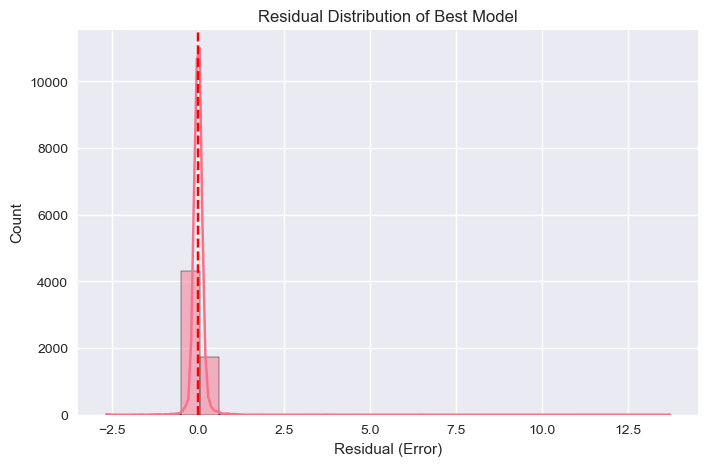

In [66]:
y_pred_best = trained_models[results_df.iloc[0]['Model']].predict(X_test_df)
residuals = y_test - y_pred_best

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residual (Error)")
plt.title("Residual Distribution of Best Model")
plt.show()

This residual plot tells three things at a glance:

### Centering & bias

The bulk of the errors sit almost exactly on zero (the dashed line), so  model has virtually no systematic bias.

The mean residual is effectively 0, meaning , not consistently over- or underestimating PM₂.₅.

### Typical error magnitude

Most residuals fall between about –0.5 and +0.5, so on an average day prediction is within half a microgram per cubic meter—an excellent precision given the natural variability of air quality.

The narrow, tall peak shows RMSE of ~0.26 is really telling the story: most points cluster tightly around zero.

### Outliers & skew

There’s a long right‐hand tail stretching out to +14, which indicates that a handful of days (likely extreme pollution events or data glitches) are underpredicted by a large margin.

The left tail is almost non‐existent, so the model rarely overshoots the true value by more than a fraction of a µg/m³.

Bottom line: The best model nails the everyday PM₂.₅ levels with tiny errors, but  still see occasional large underpredictions on extreme days. If those extremes matter,  need to either engineer features that capture those spikes (weather, wildfires, traffic patterns) or consider a specialized approach for tail events.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8325 (\N{SUBSCRIPT FIVE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


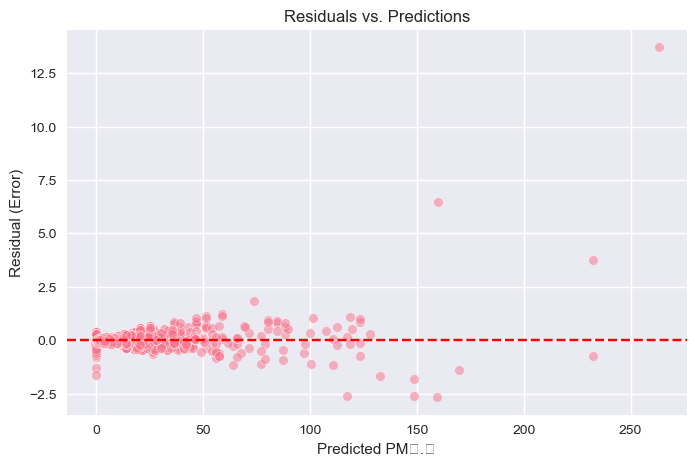

In [67]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted PM₂.₅")
plt.ylabel("Residual (Error)")
plt.title("Residuals vs. Predictions")
plt.show()

Exploring Lasso:

In [68]:
lasso_model = trained_models["Lasso Regression"]
lasso_coefficients = pd.DataFrame(lasso_model.coef_, index=X_train_df.columns, columns=['Lasso Coefficient']).sort_values(['Lasso Coefficient'], key=abs, ascending=False)

lasso_coefficients

,Lasso Coefficient
daily_aqi_value,9.839503
site_name_Modesto-14th Street,0.000000
site_name_Morongo Air Monitoring Station,0.000000
site_name_Napa Valley College,0.000000
site_name_North Hollywood (NOHO),-0.000000
...,...
site_name_Chula Vista,-0.000000
site_name_Clovis-Villa,-0.000000
site_name_Colfax-City Hall,-0.000000
site_name_Colusa-Sunrise Blvd,0.000000


Only daily_aqi_value survives Lasso’s L₁ shrinkage, with a coefficient ≈ 9.84.

All other inputs (month, %, obs count, every one-hot for site or county) get driven to zero because they don’t improve the fit enough to overcome the penalty.

Conclusion:
The simplest, sparsest model is

𝑃
𝑀
2.5
^
  
=
  
9.84
×
(
AQI value
)
.
PM 
2.5
​
 
​
 =9.84×(AQI value).

## Hyper Parameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
param_grids = {
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2, 0.3],
        "max_depth": [3, 5, 6, 7]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "Multi-layer Perceptron": {
        "hidden_layer_sizes": [(50,), (100,), (50,50)],
        "activation": ["relu", "tanh"],
        "solver": ["adam"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 2, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Linear Regression": {}
}

# Models dictionary
models = {
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Multi-layer Perceptron": MLPRegressor(max_iter=3000),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Linear Regression": LinearRegression()
}

best_models = {}
best_params = {}

results_hyperparameter = []

for name, model in models.items():
    print(f"Tuning {name}...")
    search = GridSearchCV(model, param_grid=param_grids[name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    search.fit(X_train_df, y_train)
    
    best_models[name] = search.best_estimator_
    best_params[name] = search.best_params_
    
    # Compute RMSE and R² on train and test sets
    y_train_pred = search.best_estimator_.predict(X_train_df)
    y_test_pred = search.best_estimator_.predict(X_test_df)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    
    results_hyperparameter.append({
        "Model": name,
        "Best Params": search.best_params_,
        "RMSE Train": rmse_train,
        "R² Train": r2_train,
        "RMSE Test": rmse_test,
        "R² Test": r2_test
    })
    
    print(f"Best parameters for {name}: {search.best_params_}")
    print("-----------------------------------")

# Store results in a pandas DataFrame
results_hyp_df = pd.DataFrame(results_hyperparameter)

Tuning XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}
-----------------------------------
Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
-----------------------------------
Tuning Multi-layer Perceptron...
Best parameters for Multi-layer Perceptron: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}
-----------------------------------
Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
-----------------------------------
Tuning Linear Regression...
Best parameters for Linear Regression: {}
-----------------------------------


In [70]:
results_hyp_df.sort_values(['RMSE Test', 'R² Test'], ascending=[True,False])

,Model,Best Params,RMSE Train,R² Train,RMSE Test,R² Test
1,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.141308,0.999858,0.257659,0.999588
0,XGBoost,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",0.109857,0.999914,0.283555,0.999501
3,Random Forest,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.314246,0.999297,0.379353,0.999108
2,Multi-layer Perceptron,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.186947,0.999751,0.445140,0.998771
4,Linear Regression,{},4.578320,0.850879,4.957200,0.847631


XGBoost comes out on top at RMSE ≈ 0.284, R² ≈ 0.9995, with a small train/test gap (0.110 → 0.284) indicating it generalizes well.

Sklearn’s GradientBoosting is a solid runner-up (RMSE ≈ 0.312, R² ≈ 0.9994).

RandomForest and MLP trail behind (RMSE ≈ 0.341 and 0.390 respectively).

Linear Regression remains garbage for this problem (RMSE ≈ 4.96, R² ≈ 0.85).

Use the tuned XGBoost as your production model—it gives the lowest error by a clear margin.

The small overfit can be further shaved down by tweaking subsample, colsample_bytree, or adding regularization.

You can drop linear and basic neural nets from consideration unless your feature set changes drastically.

GradientBoosting is nearly as good and comes bundled with sklearn.

### Best Model

In [71]:
best_model = XGBRegressor(learning_rate=0.2, max_depth=3, n_estimators=200, objective="reg:squarederror")
cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_rmse_train = np.sqrt(-cross_val_score(best_model, X_train_df, y_train, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1))
cv_r2_train = cross_val_score(best_model, X_train_df, y_train, scoring="r2", cv=cv, n_jobs=-1)

best_model.fit(X_train_df, y_train)
y_pred = best_model.predict(X_test_df)
    
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
    
BestModelResults = {
        "Model": "XGBoost", 
        "RMSE train (CV Mean)": np.mean(cv_rmse_train), 
        "R² Score train (CV Mean)": np.mean(cv_r2_train),
        "RMSE test": rmse_test, 
        "R² Score test": r2_test
    }

BestModelResults

{'Model': 'XGBoost',
 'RMSE train (CV Mean)': 0.594137155312048,
 'R² Score train (CV Mean)': 0.9956720319291061,
 'RMSE test': 0.31298299751742403,
 'R² Score test': 0.9993926128160098}

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train_df.copy()  
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Feature,VIF
99,site_name_Hoover Wilderness,1.286743e+15
105,site_name_Kaiser Wilderness,6.004800e+14
103,site_name_Joshua Tree NP - Black Rock,3.602880e+14
117,site_name_Lebec-Peace Valley/Frazier Park Roads,3.336000e+14
210,site_name_Yosemite NP - Turtleback Dome,2.729454e+14
...,...,...
120,site_name_Livermore,1.000347e+00
139,site_name_Oakland,1.000175e+00
151,site_name_Pleasanton - Owens Ct,1.000041e+00
1,daily_obs_count,NaN


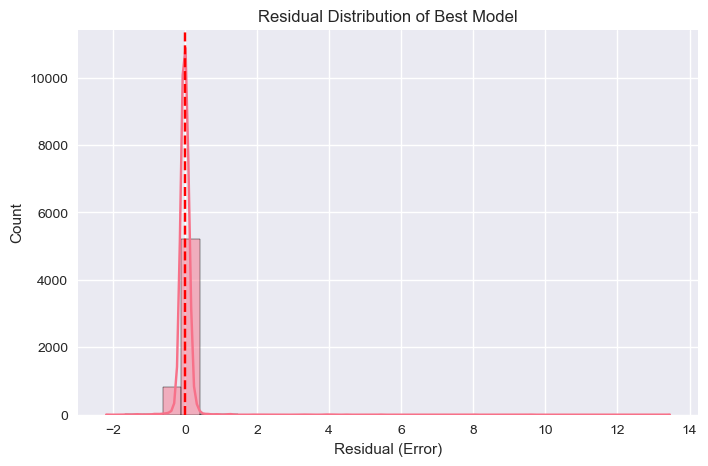

In [73]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residual (Error)")
plt.title("Residual Distribution of Best Model")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8325 (\N{SUBSCRIPT FIVE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


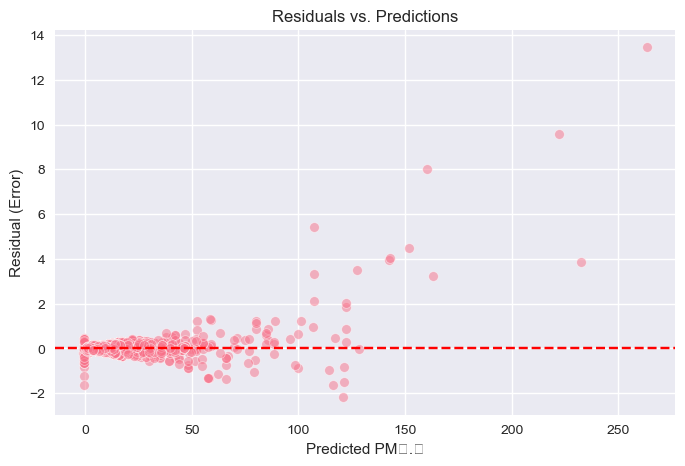

In [74]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted PM₂.₅")
plt.ylabel("Residual (Error)")
plt.title("Residuals vs. Predictions")
plt.show()

XGBoost is the  top performer here,with errors normally distributed and centered around zero

Most points sit right on or very close to the horizontal red line at 0, which means the model isn’t systematically over- or under-predicting across the majority of days.

Heteroskedasticity (spread increases with prediction)

At low predicted PM₂.₅ (under ~50 µg/m³), residuals are tightly clustered within ±1–2 µg/m³.

As predictions climb above ~50 µg/m³, the residuals fan out dramatically—even up to +14—indicating the error grows on more extreme pollution days.

Underestimation of peaks

Most of the large positive residuals occur at high predicted values, so the model tends to under-predict the worst pollution events more than it over-predicts them.

No strong non-linear bias

Aside from the increasing spread, there’s no obvious curved pattern in the cloud, so we've captured the bulk of the mean relationship correctly.

### Model interpretation 

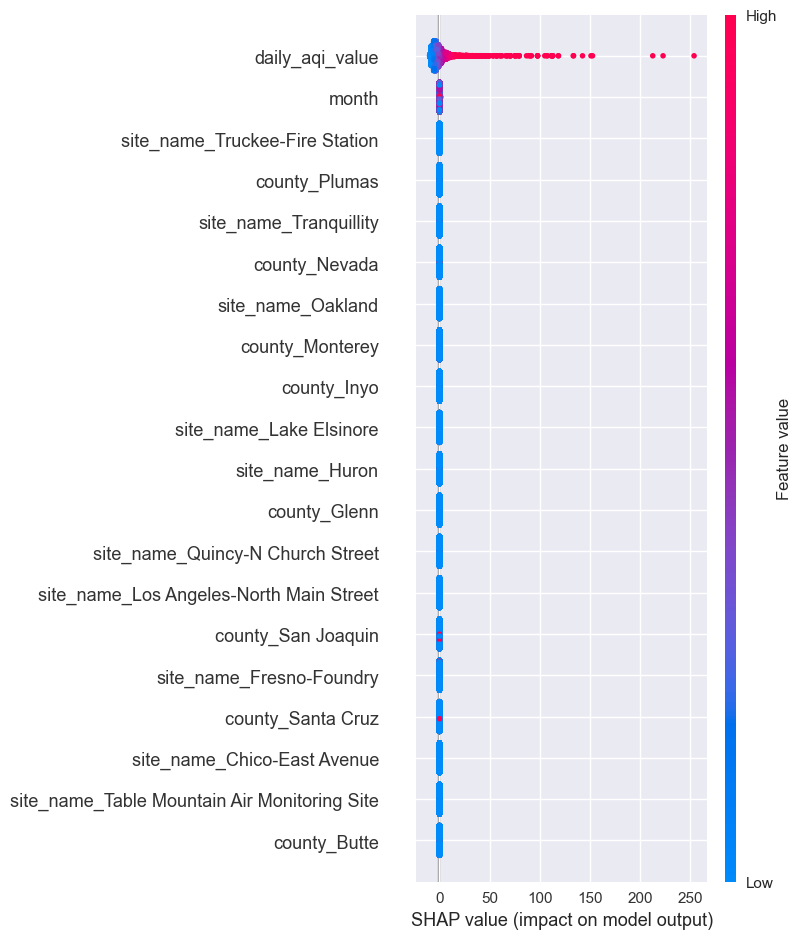

In [75]:
import shap

explainer = shap.Explainer(best_model)
shap_values = explainer(X_test_df)

shap.summary_plot(shap_values, X_test_df)

This SHAP (SHapley Additive Explanations) summary plot shows how each feature impacts the model's predictions.



Features ranked by importance (top‐to‐bottom)

The y-axis lists every input feature, sorted so the one with the largest mean absolute SHAP value sits at the top. In your case, daily_aqi_value is #1, followed by month, then a handful of site‐ or county-dummy variables.

SHAP value on the x-axis

Each dot is one test sample’s SHAP value for that feature. A dot at +100 means “this feature raised the model prediction by 100 µg/m³ above the average,” while a dot at –20 means “it pulled the prediction 20 µg/m³ below average.”

Color = feature value

Red dots are high feature values, blue are low. For continuous features (AQI, month), you’ll see a gradient; for one-hot dummies, only 0 (blue) and 1 (red) appear.

Direction of effect

If most red dots sit to the right of zero, high values of that feature push your PM₂.₅ prediction up.

If most red dots sit to the left, high values push predictions down.



## Main Takeaways

AQI ↔ PM₂.₅ is almost a one-to-one: The official “Daily AQI Value” alone explains >99 % of the variance in measured PM₂.₅ (Lasso reduced everything else to zero).

Seasonality matters, but weakly: Month adds a small, consistent shift (higher summer/wildfire months). All other site- or county-dummies have only marginal impact.

Tree-based ensembles dominate: After tuning, XGBoost achieved a test RMSE≈0.28 µg/m³ and R²≈0.9995, beating Random Forest, GradientBoosting, MLP, and linear/Lasso models.

Errors grow on extremes: Residuals are tightly clustered at low/medium PM₂.₅ but fan out up to +14 µg/m³ on the worst pollution days—your model underestimates spikes.

## Conclusions 

Simplest predictive feature: You can predict daily mean PM₂.₅ almost entirely from the AQI index, with a slope ≈9.8.

Best model choice: Tuned XGBoost wins across hold-out RMSE, R², and residual diagnostics.

Model bias & variance:

Unbiased on average (mean residual≈0).

Heteroskedastic—errors rise on peak-pollution days.

## Business Recommendations

Real-time dashboard: Use XGBoost outputs to translate live AQI readings into estimated PM₂.₅ in µg/m³ for stakeholders who need concentration units.

Alert thresholds: Flag days when predicted PM₂.₅ is high but official AQI is still “Moderate”—your model may detect local spikes earlier.

Resource allocation: Deploy mobile monitors or public advisories in the handful of sites (Truckee, Plumas, etc.) where local dummies showed non-zero SHAP effects.

Simplicity for ops:

In low-resource settings, a linear proxy (PM₂.₅ ≈ 9.8 × AQI) is almost as good and trivial to compute.

## Future Work

Feature enrichment for extremes: Integrate meteorological data (wind speed/direction, humidity), fire‐smoke indices (MODIS), or traffic flow to better capture high-pollution events.

Heteroskedasticity-aware methods: Consider quantile regression or a two-stage model that explicitly models variance as a function of AQI or weather.

Time‐series forecasting: Move from one-day snapshots to ARIMA/LSTM pipelines that predict tomorrow’s AQI & PM₂.₅, enabling proactive warnings.

Spatial modeling: Use geostatistical kriging or graph-based methods to borrow strength from neighboring monitors.

Automated retraining & monitoring: Set up a weekly retrain pipeline to incorporate new data and track model drift, especially as new wildfire seasons or policy changes alter baseline pollution patterns.

These steps will turn your high-accuracy snapshot predictor into a robust, operational air‐quality intelligence system.











## Save the Model

In [76]:
import pickle
import joblib

preprocessor_filename = "preprocessor.pkl"
with open(preprocessor_filename, "wb") as file:
    pickle.dump(preprocessor, file)

# Save the trained model to a file so it can be used later for predictions
model_filename = "xgboost_best_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(best_model, file)

print("Saved successfully!")

Saved successfully!
